In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='roberta-large'

# the commands below didn't work inside for loop and got CUDA out of memory Error.
#     with torch.no_grad():
#        torch.cuda.empty_cache()
#    del data, model, trainer, acc, f1
# Instead of running these commands in a loop, execute them cell by cell, restarting between them.
# Each cell will print its results. To keep the results and avoid re-running specific cells, skip them intermittently on each run.

In [3]:
results = {'acc':[],
           'f1':[],
           'g':[]}

In [4]:
lr = 1.0e-5
g = 2

print(f'Grid search {model_checkpoint}, lr: {lr} ,focal loss, gamma: {g}')
data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['g'].append(g)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 1e-05 ,focal loss, gamma: 2


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	7.7766	Val Loss:	1.8926	Accuracy:	0.3521	F1:	0.2861
2 / 30: Train Loss:	4.3549	Val Loss:	1.1955	Accuracy:	0.6124	F1:	0.5786
3 / 30: Train Loss:	1.9726	Val Loss:	0.9521	Accuracy:	0.6953	F1:	0.6745
4 / 30: Train Loss:	1.0983	Val Loss:	0.8465	Accuracy:	0.7308	F1:	0.7296
5 / 30: Train Loss:	0.6568	Val Loss:	0.7940	Accuracy:	0.7633	F1:	0.7490
6 / 30: Train Loss:	0.3562	Val Loss:	0.7678	Accuracy:	0.7692	F1:	0.7451
7 / 30: Train Loss:	0.2227	Val Loss:	0.8047	Accuracy:	0.7456	F1:	0.7318
8 / 30: Train Loss:	0.1580	Val Loss:	0.8038	Accuracy:	0.7604	F1:	0.7384
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.80      0.67      0.73        67
               anecdote       0.95      0.88      0.92        43
         cherry picking       0.69      0.80      0.74        56
      conspiracy theory       0.80      0.92      0.86        39
          

In [4]:
lr = 1.0e-5
g = 4

print(f'Grid search {model_checkpoint}, lr: {lr} ,focal loss, gamma: {g}')
data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['g'].append(g)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 1e-05 ,focal loss, gamma: 4


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	6.1470	Val Loss:	1.8950	Accuracy:	0.3698	F1:	0.2795
2 / 30: Train Loss:	2.9964	Val Loss:	1.2039	Accuracy:	0.6361	F1:	0.6105
3 / 30: Train Loss:	1.1687	Val Loss:	0.9442	Accuracy:	0.7041	F1:	0.6989
4 / 30: Train Loss:	0.5808	Val Loss:	0.9022	Accuracy:	0.7456	F1:	0.7337
5 / 30: Train Loss:	0.2538	Val Loss:	0.8508	Accuracy:	0.7396	F1:	0.7118
6 / 30: Train Loss:	0.1821	Val Loss:	0.8102	Accuracy:	0.7544	F1:	0.7417
7 / 30: Train Loss:	0.1899	Val Loss:	0.8277	Accuracy:	0.7544	F1:	0.7367
8 / 30: Train Loss:	0.1590	Val Loss:	0.8175	Accuracy:	0.7367	F1:	0.7235
9 / 30: Train Loss:	0.0853	Val Loss:	0.7668	Accuracy:	0.7485	F1:	0.7333
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.76      0.66      0.70        67
               anecdote       0.93      0.88      0.90        43
         cherry picking       0.69      0.82      0.75        56
   

In [4]:
lr = 1.0e-5
g = 8

print(f'Grid search {model_checkpoint}, lr: {lr} ,focal loss, gamma: {g}')
data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['g'].append(g)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 1e-05 ,focal loss, gamma: 8


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	3.8853	Val Loss:	1.9431	Accuracy:	0.3609	F1:	0.2954
2 / 30: Train Loss:	1.7429	Val Loss:	1.3027	Accuracy:	0.6006	F1:	0.5727
3 / 30: Train Loss:	0.6378	Val Loss:	1.0756	Accuracy:	0.7071	F1:	0.6774
4 / 30: Train Loss:	0.2945	Val Loss:	1.0105	Accuracy:	0.7249	F1:	0.7047
5 / 30: Train Loss:	0.1319	Val Loss:	0.9680	Accuracy:	0.7278	F1:	0.7157
6 / 30: Train Loss:	0.0763	Val Loss:	0.9027	Accuracy:	0.7485	F1:	0.7267
7 / 30: Train Loss:	0.0384	Val Loss:	0.8950	Accuracy:	0.7456	F1:	0.7227
8 / 30: Train Loss:	0.0240	Val Loss:	0.8665	Accuracy:	0.7515	F1:	0.7420
9 / 30: Train Loss:	0.0222	Val Loss:	0.8642	Accuracy:	0.7515	F1:	0.7329
10 / 30: Train Loss:	0.0184	Val Loss:	0.8733	Accuracy:	0.7456	F1:	0.7334
11 / 30: Train Loss:	0.0116	Val Loss:	0.8483	Accuracy:	0.7485	F1:	0.7297
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.71      0.76      0.

In [4]:
lr = 1.0e-5
g = 16

print(f'Grid search {model_checkpoint}, lr: {lr} ,focal loss, gamma: {g}')
data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=16)
data.setup_dataloaders()
model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
trainer = Engine(epochs=30,labels=data.labels)
trainer.model = model.model
trainer.dataset_encoded = data.dataset_encoded
acc, f1 = trainer.run(lr=lr,
                        wd=0.0,
                        train_dataloader=data.train_dataloader,
                        eval_dataloader=data.eval_dataloader,
                        test_dataloader=data.test_dataloader,
                        focalloss=True,
                        early_stop=3,
                        accumulation_steps=2,
                        gamma=g)
results['acc'].append(acc)
results['f1'].append(f1)
results['g'].append(g)
print('### '*10)
print(results)
print('### '*10)

Grid search roberta-large, lr: 1e-05 ,focal loss, gamma: 16


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.6026	Val Loss:	2.0768	Accuracy:	0.3018	F1:	0.2412
2 / 30: Train Loss:	0.6787	Val Loss:	1.5151	Accuracy:	0.5592	F1:	0.5309
3 / 30: Train Loss:	0.2244	Val Loss:	1.2547	Accuracy:	0.6775	F1:	0.6524
4 / 30: Train Loss:	0.1059	Val Loss:	1.1685	Accuracy:	0.7249	F1:	0.7055
5 / 30: Train Loss:	0.0503	Val Loss:	1.1056	Accuracy:	0.7278	F1:	0.7216
6 / 30: Train Loss:	0.0265	Val Loss:	1.0557	Accuracy:	0.7308	F1:	0.7192
7 / 30: Train Loss:	0.0241	Val Loss:	1.0323	Accuracy:	0.7278	F1:	0.6988
8 / 30: Train Loss:	0.0093	Val Loss:	0.9962	Accuracy:	0.7515	F1:	0.7259
9 / 30: Train Loss:	0.0195	Val Loss:	1.0262	Accuracy:	0.7426	F1:	0.7268
10 / 30: Train Loss:	0.0089	Val Loss:	0.9936	Accuracy:	0.7278	F1:	0.6983
11 / 30: Train Loss:	0.0045	Val Loss:	0.9603	Accuracy:	0.7426	F1:	0.7276
12 / 30: Train Loss:	0.0038	Val Loss:	0.9387	Accuracy:	0.7544	F1:	0.7391
13 / 30: Train Loss:	0.0024	Val Loss:	0.9454	Accuracy:	0.7544	F1:	0.7323
14 / 30: Train Loss:	0.0025	Val Loss:	0.9448	Accuracy:	0.754

In [5]:
from collections import defaultdict 

a = {'acc': [0.746031746031746], 'f1': [0.713434227973235], 'g': [2]}
b = {'acc': [0.7619047619047619], 'f1': [0.7292613326185481], 'g': [4]}
c = {'acc': [0.7619047619047619], 'f1': [0.7382131529064938], 'g': [8]}
d = {'acc': [0.7301587301587301], 'f1': [0.6872870285493861], 'g': [16]}

results = defaultdict(list)
for d in (a,b,c,d):
    for k,v in d.items():
        results[k].append(v[0])

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

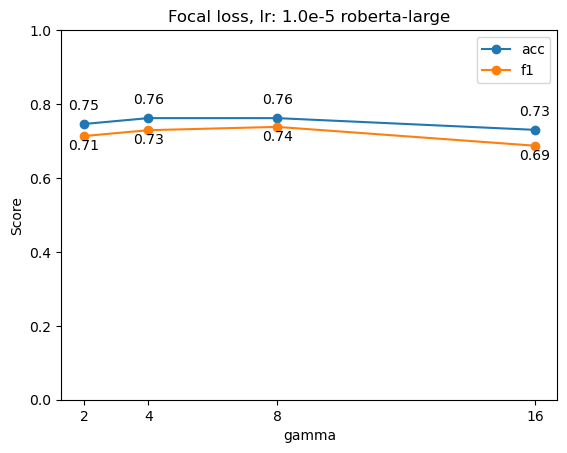

In [7]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='g', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["g"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["g"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['g'], [val for val in df['g']], ha='center')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('gamma')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Focal loss, lr: 1.0e-5 {model_checkpoint}')